# Build a Model

Dataset: Fashion-MNIST https://keras.io/api/datasets/fashion_mnist/

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
import numpy as np

(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

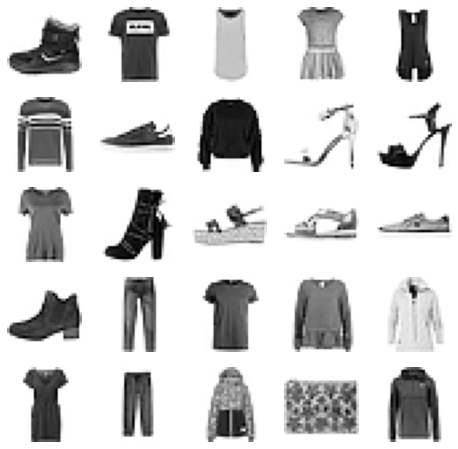

In [2]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

## 1. Preparing our data
Don't flatten our images! But we need to reshape a bit, so it is 4-dimensional: number of samples, height, width, depth/color-channels. 

In [8]:
xtest.shape

(10000, 28, 28)

In [10]:
x_train = xtrain.reshape(60000, 28, 28, 1)/255
x_test = xtest.reshape(10000, 28, 28, 1)/255

In [11]:
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

## 2. Building the model

In [12]:
K.clear_session()

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), input_shape=(28, 28, 1), activation='relu'),  
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Flatten(),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                80050     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

## 3. Compiling the model

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 4. Training the model

In [15]:
h = model.fit(x_train, y_train, epochs=15, batch_size=200, validation_split=0.2)

Epoch 1/15
240/240 [==============================] - 17s 67ms/step - loss: 1.0211 - accuracy: 0.6466 - val_loss: 0.4447 - val_accuracy: 0.8464
Epoch 2/15
240/240 [==============================] - 17s 70ms/step - loss: 0.4298 - accuracy: 0.8467 - val_loss: 0.3853 - val_accuracy: 0.8628
Epoch 3/15
240/240 [==============================] - 17s 70ms/step - loss: 0.3587 - accuracy: 0.8714 - val_loss: 0.3406 - val_accuracy: 0.8780
Epoch 4/15
240/240 [==============================] - 18s 75ms/step - loss: 0.3302 - accuracy: 0.8804 - val_loss: 0.3481 - val_accuracy: 0.8727
Epoch 5/15
240/240 [==============================] - 17s 70ms/step - loss: 0.3056 - accuracy: 0.8895 - val_loss: 0.3269 - val_accuracy: 0.8838
Epoch 6/15
240/240 [==============================] - 19s 79ms/step - loss: 0.2962 - accuracy: 0.8928 - val_loss: 0.3013 - val_accuracy: 0.8917
Epoch 7/15
240/240 [==============================] - 21s 88ms/step - loss: 0.2654 - accuracy: 0.9047 - val_loss: 0.2901 - val_accuracy:

## 5. Evaluate and tune 

In [16]:
score = model.evaluate(x_train, y_train, batch_size=100)
score

600/600 [==============================] - 4s 6ms/step - loss: 0.1899 - accuracy: 0.9325


[0.1899469792842865, 0.9325000047683716]

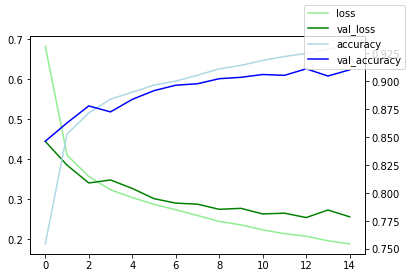

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(h.history['loss'], color="lightgreen", label="loss") 
ax1.plot(h.history['val_loss'], color="green", label="val_loss") 
ax2 = ax1.twinx()
ax2.plot(h.history['accuracy'], color="lightblue", label='accuracy') 
ax2.plot(h.history['val_accuracy'], color="blue", label='val_accuracy') 
fig.legend()

Hyperparameters: 
- number of layers,
- number of filters, 
- filter-size, 
- max/mean pooling, 
- stride (filter and pooling),
- regularization,
- epochs,
- ...

# Further reading:

**VGG16-architecture**  
https://neurohive.io/en/popular-networks/vgg16/

**Stanford Ressource**  
https://cs231n.github.io/convolutional-networks/

**Dive into the math behind convolutional neural networks**    
https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9

**Visualization toolbox**  
https://www.youtube.com/watch?v=AgkfIQ4IGaM

**How to visualize filters in cnns**  
https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

**How to visualize filters in deep layers**  
https://www.researchgate.net/profile/Aaron_Courville/publication/265022827_Visualizing_Higher-Layer_Features_of_a_Deep_Network/links/53ff82b00cf24c81027da530.pdf

**Self-driving car with CNN - video-series**   
 https://www.youtube.com/watch?v=oLi6mWDXRGM

**Little drawing game based on ConvNet:**  
https://quickdraw.withgoogle.com/